### About The Project:
    1) I used Republic of palto books data this dataset is available on google.
    
    1) It took around 10 hours for train
    

In [1]:
import numpy as np
import re, string

from random import randint
from pickle import dump, load
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences



Using TensorFlow backend.


### Reading Dataset

In [2]:
# load doc into memory
def load_doc(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text


# load document
in_filename = '/home/hasan/DATA SET/Republic Plato Data/Republic Plato.txt'
doc = load_doc(in_filename)
print(doc[:200])


BOOK I.

I went down yesterday to the Piraeus with Glaucon the son of Ariston,
that I might offer up my prayers to the goddess (Bendis, the Thracian
Artemis.); and also because I wanted to see in what


### Cleaning Data

In [3]:
# turn a doc into clean tokens
def clean_doc(doc):
    doc = doc.replace('--' , ' ')
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile( ' [%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub( '' , w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word.lower() for word in tokens]
    return tokens


# clean document
tokens = clean_doc(doc)
print( ' Total Tokens: %d' % len(tokens))
print( ' Unique Tokens: %d' % len(set(tokens)))
print('\n\n', tokens[:200])


 Total Tokens: 101762
 Unique Tokens: 6245


 ['book', 'i', 'went', 'down', 'yesterday', 'to', 'the', 'piraeus', 'with', 'glaucon', 'the', 'son', 'of', 'that', 'i', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', 'the', 'thracian', 'and', 'also', 'because', 'i', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'which', 'was', 'a', 'new', 'i', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'but', 'that', 'of', 'the', 'thracians', 'was', 'if', 'not', 'when', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'and', 'at', 'that', 'instant', 'polemarchus', 'the', 'son', 'of', 'cephalus', 'chanced', 'to', 'catch', 'sight', 'of', 'us', 'from', 'a', 'distance', 'as', 'we', 'were', 'starting', 'on', 'our', 'way', 'and', 'told', 'his', 'servant', 'to', 'run', 'and', 'bid', 'us', 'wait', 'for', 'the', 'servant', 'took', 'hold', 'of', 'me', 'by', 'the', 'cloak'

### Creating Sequence of Token

In [4]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    seq = tokens[i-length:i]
    line = ' ' .join(seq)
    sequences.append(line)
    
print('Total Sequences: %d' % len(sequences))
#print('\n\n',sequence[0:10])

Total Sequences: 101711


### Saving Tokens

In [5]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = ' \n ' .join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
    
# save sequences to file
out_filename = '/home/hasan/DATA SET/Republic Plato Data/republic_sequences.txt'
save_doc(sequences, out_filename)

### Loading Tokens

In [6]:
# load
in_filename = '/home/hasan/DATA SET/Republic Plato Data/republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

### Encode Sequence

In [7]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [22]:
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

### Vocabulary Size

In [9]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

### Input and Output Sequence 

In [10]:
# separate into input and output
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

### Model

In [11]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation= 'softmax'))
    

In [12]:
# summarize defined model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            312300    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 100)           60400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 6246)              630846    
Total params: 1,094,046
Trainable params: 1,094,046
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile network
model.compile(loss='categorical_crossentropy', 
              optimizer= 'adam', 
              metrics=['accuracy'])

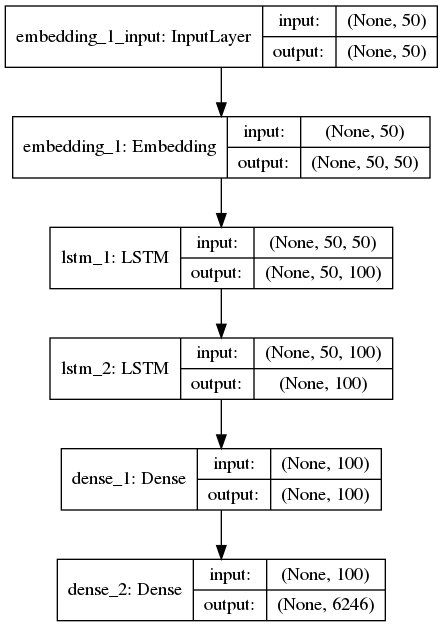

In [14]:
#plot model
plot_model(model, to_file='model.png', show_shapes=True)


### Fit Model

In [15]:
# fit model
model.fit(X, y, batch_size=128, epochs=200)

/home/hasan/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/200
101711/101711 [==============================] - 163s 2ms/step - loss: 5.9172 - accuracy: 0.0777
Epoch 2/200
101711/101711 [==============================] - 160s 2ms/step - loss: 5.5410 - accuracy: 0.1104
Epoch 3/200
101711/101711 [==============================] - 161s 2ms/step - loss: 5.3533 - accuracy: 0.1338
Epoch 4/200
101711/101711 [==============================] - 160s 2ms/step - loss: 5.2051 - accuracy: 0.1497
Epoch 5/200
101711/101711 [==============================] - 160s 2ms/step - loss: 5.0908 - accuracy: 0.1581
Epoch 6/200
101711/101711 [==============================] - 157s 2ms/step - loss: 4.9994 - accuracy: 0.1625
Epoch 7/200
101711/101711 [==============================] - 157s 2ms/step - loss: 4.9214 - accuracy: 0.1671
Epoch 8/200
101711/101711 [==============================] - 157s 2ms/step - loss: 4.8507 - accuracy: 0.1713
Epoch 9/200
101711/101711 [==============================] - 158s 2ms/step - loss: 4.7858 - accuracy: 0.1760
Epoch 10/200
101711

### Save Model

In [16]:
# save the model to file
model.save('model.h5')


### Generate Text

In [17]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)



In [23]:
# load cleaned text sequences
in_filename = '/home/hasan/DATA SET/Republic Plato Data/republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model('model.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')


/home/hasan/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


 as just or he would think it and would try to gain the but he would not be whether he would or would not be i is not to the my question is only whether the just while refusing to have more than another just would wish and claim to have 



In [24]:
# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)


a common interest in the state from his own miserable of all is the he and the oligarch is third and the worker in leather and brass will be the victims of it and the species of imitation are in or the same is the progress which you call truth
